In [105]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [67]:
class DenoisingAutoencoder(keras.Model):
    def __init__(self, latent_dim):
        super(DenoisingAutoencoder, self).__init__()
        self.encoder = keras.Sequential([
            layers.Input(shape=(input_dim,)),  # Input layer
            layers.Dense(128, activation='relu'),  # Hidden layer
            layers.Dense(latent_dim, activation='relu')  # Latent space
        ])
        self.decoder = keras.Sequential([
            layers.Dense(128, activation='relu'),  # Hidden layer
            layers.Dense(input_dim, activation='sigmoid')  # Output layer
        ])

    def call(self, x):
        noise = tf.random.normal(shape=tf.shape(x), mean=0.0, stddev=1)  # Add Gaussian noise
        x_noisy = x + noise  # Create noisy input
        encoded = self.encoder(x_noisy)  # Encode noisy input
        decoded = self.decoder(encoded)  # Decode back to original
        return decoded

In [68]:
# Example: Generate random data for demonstration (replace with your actual data)
input_dim = 784  # Example input dimension (e.g., flattened images)
data = np.random.rand(1000, input_dim)  # Replace with your actual dataset

In [69]:
latent_dim = 64  # Dimension of latent space
autoencoder = DenoisingAutoencoder(latent_dim)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(data, data, epochs=50, batch_size=32)  # Train on original data

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0848  
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0832
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0832
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0832
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0831
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0832
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0832
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0832
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0832
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0832
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0832
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0831
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0831
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0833
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0831
Epoch 16/50
32/32

In [96]:
# Encoding a message
message = np.random.rand(1, input_dim)  # Example message (replace with actual message)
encoded_message = autoencoder.encoder(message)

noise = tf.random.normal(shape=tf.shape(encoded_message), mean=0.0, stddev=3)  # Add Gaussian noise
encoded_message = encoded_message + noise  # Create noisy input

# Decoding the encoded message
decoded_message = autoencoder.decoder(encoded_message)


In [97]:
tf.reduce_sum(abs(message-decoded_message)**2).numpy()

110.98053

In [99]:
mse = np.zeros(20)

In [100]:
for i in range(1000):
    for j in range(20):
        # Encoding a message
        message = np.random.rand(1, input_dim)  # Example message (replace with actual message)
        encoded_message = autoencoder.encoder(message)

        noise = tf.random.normal(shape=tf.shape(encoded_message), mean=0.0, stddev=j*0.05)  # Add Gaussian noise
        encoded_message = encoded_message + noise  # Create noisy input

        # Decoding the encoded message
        decoded_message = autoencoder.decoder(encoded_message)

        mse[j] += tf.reduce_sum(abs(message-decoded_message)**2).numpy()

mse /= 1000

In [101]:
mse

array([65.41580456, 65.33938193, 65.35793812, 65.45891516, 65.42816784,
       65.57234   , 65.66276228, 65.85394663, 65.91720318, 66.20714029,
       66.4991255 , 66.78411128, 67.06961444, 67.4582015 , 67.65043478,
       67.91705878, 68.39548204, 68.7213033 , 69.27119351, 69.87743124])

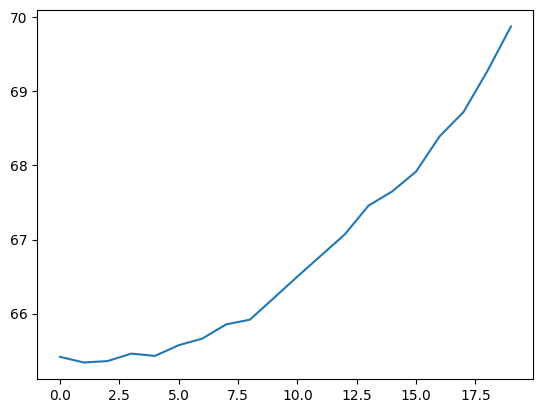

In [106]:
plt.plot(mse)